### Principal Components Analysis (PCA)

PCA is a preprocessing step, which decomposes a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. It is used when we need to tackle datasets with a large number of features with different scales, some of which might be correlated. These correlations and the high dimension of the dataset bring a redudancy in the information. Applying PCA, the original features are transformed to linear combinations of new independent variables, which reduce the complexity of the dataset and thus, the computational cost.

Summarizing, the main purpose of principal component analysis is to:

  + identify hidden pattern in a data set,
  + reduce the dimensionnality of the data by removing the noise and redundancy in the data,
  + identify correlated variables

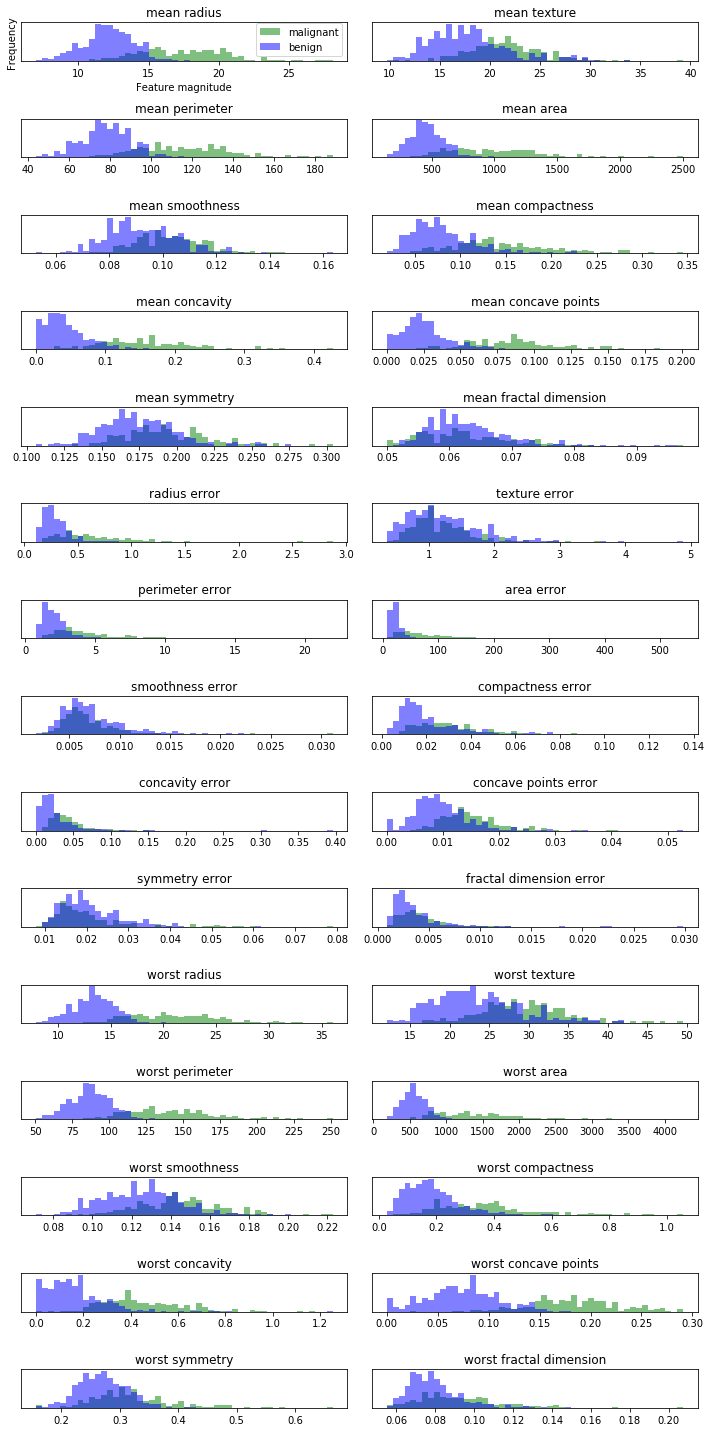

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color="g", alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color="b", alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [6]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=3)
# fit PCA model to beast cancer data
pca.fit(cancer.data)

# transform data onto the first two principal components
X_pca = pca.transform(cancer.data)
print("Original shape: {}".format(str(cancer.data.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 3)


Text(0,0.5,'Second principal component')

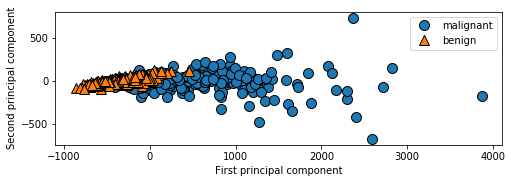

In [8]:
import mglearn

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [9]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (3, 30)


In [10]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.57042845e-04 -5.5307

Text(0,0.5,'Principal components')

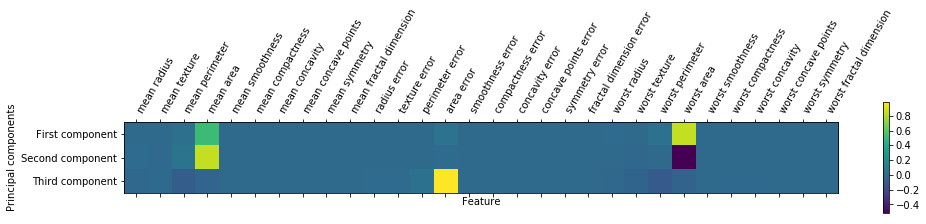

In [11]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component", "Third component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60, ha='left')
#plt.tight_layout()
plt.xlabel("Feature")
plt.ylabel("Principal components")
